# E-tivity 3: Linear Regression

## Name: Martin Power
## ID      : 9939245

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split

# My imports
# Note: Task 4 states "You should not add any other imports than those necessary for your chosen scikit-learn algorithm."
# I am assuming this refers to importing things like score method from sklearn.metric and not pandas for reading in CSV
import pandas as pd

# Functions and Classes for Task 4
* Added MyLinReg() to perform Linear Regression
* Added a generic Mean Squared Error function to allow me to compare the MSE performance of the sklearn regression algorithms with my own Linear Regression algorithm
  - NOTE: I added my own version of MSE as sklearn.metrics.mean_squared_error would require a banned import

In [2]:
class MyLinReg(object):
    
    def __init__ (self, n_weights):
        self.weights = np.zeros([(n_weights+1),])
        
    def fit(self,X,y):
        X_1s = np.c_[np.ones([X.shape[0],1]),X]
        X_1s_dagger = np.linalg.pinv(X_1s)
        self.weights = np.matmul(X_1s_dagger,y)
        
    def predict(self,X):
        X_1s = np.c_[np.ones([X.shape[0],1]),X]
        #yhat = np.sign(np.matmul(X_1s,self.weights)) # <-- Used for classifier
        yhat = np.matmul(X_1s,self.weights)           # <-- Used for regression 
        
        return yhat
      
    def mse(self,X,y):
        yhat = self.predict(X)
        se = 0.0 

        for i in range(len(y)):

            se+=(yhat[i]-y[i])**2
        
        if(se!=0.0):
            mse = se/len(y)
        else:
            mse = se
        return mse    

In [3]:
# Generic Mean Squared Error Function
def mse(y,yhat):
    se = 0.0 

    for i in range(len(y)):
        se+=(yhat[i]-y[i])**2

    if(se!=0.0):
        mse = se/len(y)
    else:
        mse = se
    
    return mse

In [4]:
# Use this variable to make random methods reproducible
# Set to None for full randomness
# Set to an integer value for repeatability
RANDOM_STATE = 0

TEST_SIZE = 0.2

# Import Dataset

In [5]:
df = pd.read_csv("./Task4.csv")

print("Number of Samples  in Dataset:\t",df.shape[0])
print("Number of Features in Dataset:\t",df.shape[1])

Number of Samples  in Dataset:	 100
Number of Features in Dataset:	 2


In [6]:
# Print statistical summary for all attributes
df.describe(include='all')

,X,y
count,100.000000,100.000000
mean,0.499995,0.786404
std,0.293037,0.396402
min,0.000000,-0.347000
25%,0.250250,0.639750
50%,0.500000,0.928000
75%,0.749750,1.075000
max,1.000000,1.270000


In [7]:
X = df['X'].values
X = np.expand_dims(X, axis=1) # Adding an additional dimension, useful later for passing to regression classs
y = df['y'].values

In [8]:
print(X.shape)
print(y.shape)

(100, 1)
(100,)


# Split Dataset Into Train Set and Test Set
* Splitting dataset before doing any plots etc so that test set is not snooped

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

# Linear Regression on Original Dataset
* This is an initial baseline run without any feature transforms
* Linear Regression is performed on the unmodified dataset

In [10]:
mlr_orig = MyLinReg(X_train.shape[1])
mlr_orig.fit(X_train,y_train)

In [11]:
yhat_orig_train = mlr_orig.predict(X_train)
yhat_orig_test = mlr_orig.predict(X_test)

In [12]:
mlr_orig_train_mse = mlr_orig.mse(X_train,y_train)
mlr_orig_test_mse  = mlr_orig.mse(X_test,y_test)

print("Training MSE :\t",mlr_orig_train_mse)
print("Test     MSE :\t",mlr_orig_test_mse)

Training MSE :	 0.1042692674644882
Test     MSE :	 0.09708951737742094


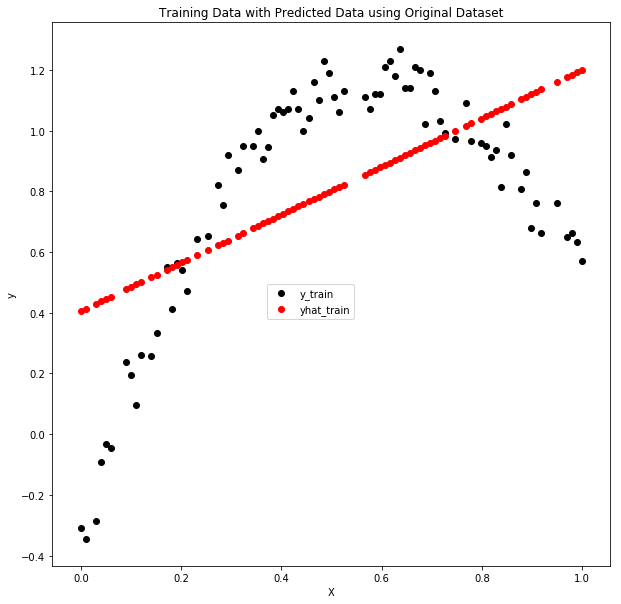

In [13]:
# Plot Training Data
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Training Data with Predicted Data using Original Dataset")
plt.ylabel('y')
plt.xlabel('X')
plt.scatter(X_train, y_train, color='k', label='y_train') 
plt.scatter(X_train, yhat_orig_train,color='r',label='yhat_train') 
plt.figlegend(loc='center')

plt.show() 

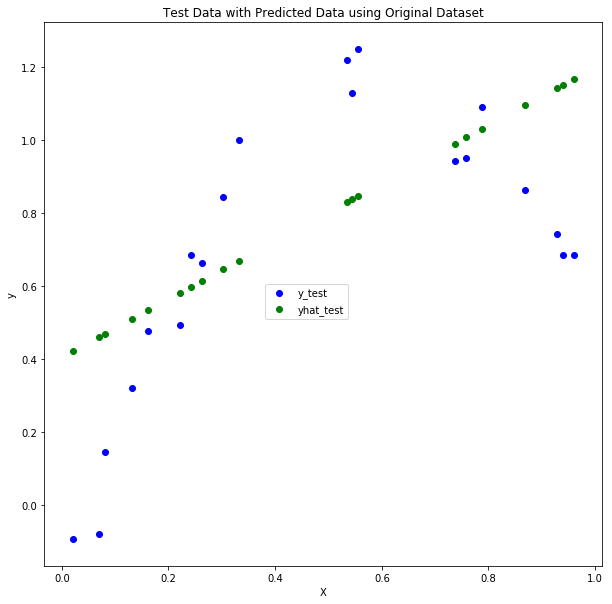

In [14]:
# Plot Test Data
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Test Data with Predicted Data using Original Dataset")
plt.ylabel('y')
plt.xlabel('X')
plt.scatter(X_test, y_test,color='b', label='y_test') 
plt.scatter(X_test, yhat_orig_test,color='g',label='yhat_test') 
plt.figlegend(loc='center')
plt.show() 

# Add Additional Features

## Adding x^2
Looking at the training data (and being guilty of data snooping), the function has the shape of a parabola.
Exercise 3.13 in "Learning from Data" gives equations for the following types of boundaries:
* Parabola
* Circle
* Ellipse
* Hyperbola
* Line

Using the graphing calculator at https://www.desmos.com/calculator, I used these equations to get a feel for what the different boundaries look like when plotted.

From experimenting with this, I can see that a general equation for a parabola can be captured as:
ax^2 + bx + c = y

I already have the "x" feature, c is effectively the bias,  so I am going to add the "x^2" feature and see if the linear regression can learn suitable "a", "b" and "c" values to apporximate y

In [15]:
df['Xsqrd'] = (X)**2

In [16]:
df.describe(include='all')

,X,y,Xsqrd
count,100.000000,100.000000,100.000000
mean,0.499995,0.786404,0.335007
std,0.293037,0.396402,0.302833
min,0.000000,-0.347000,0.000000
25%,0.250250,0.639750,0.062648
50%,0.500000,0.928000,0.250025
75%,0.749750,1.075000,0.562148
max,1.000000,1.270000,1.000000


In [17]:
df.head()

,X,y,Xsqrd
0,0.0000,-0.3080,0.000000
1,0.0101,-0.3470,0.000102
2,0.0202,-0.0937,0.000408
3,0.0303,-0.2860,0.000918
4,0.0404,-0.0927,0.001632


In [18]:
# Create a dataset with X and X^2 and call this "parab" for parabola
X_parab = df[['X','Xsqrd']].values

In [19]:
# Split into Test and Train
X_parab_train, X_parab_test, y_parab_train, y_parab_test = train_test_split(X_parab, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# Linear Regression on Modified Dataset
* This is the dataset that consists of X and X^2
* Linear Regression is performed on this modified dataset

In [20]:
mlr_parab = MyLinReg(X_parab_train.shape[1])
mlr_parab.fit(X_parab_train,y_parab_train)

In [21]:
mlr_parab_train_mse = mlr_parab.mse(X_parab_train,y_parab_train)
mlr_parab_test_mse  = mlr_parab.mse(X_parab_test,y_parab_test)

print("Training MSE :\t",mlr_parab_train_mse)
print("Test     MSE :\t",mlr_parab_test_mse)

Training MSE :	 0.004735740085299895
Test     MSE :	 0.0060387050924853684


In [22]:
yhat_parab_train = mlr_parab.predict(X_parab_train)
yhat_parab_test = mlr_parab.predict(X_parab_test)

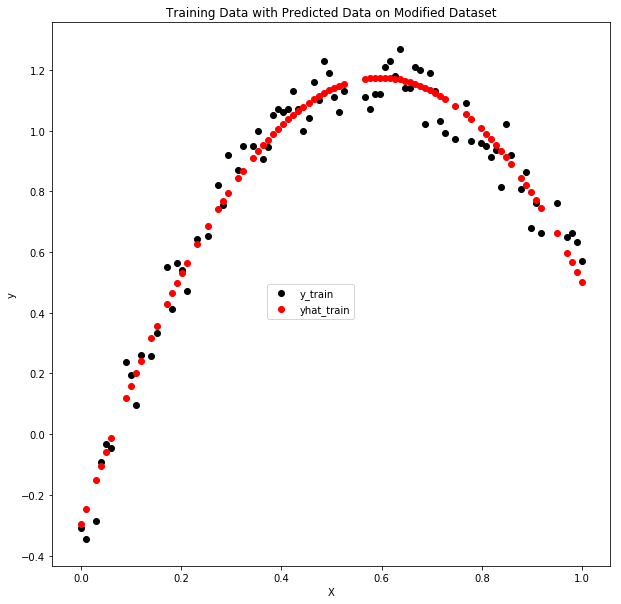

In [23]:
# Plot Training Data
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Training Data with Predicted Data on Modified Dataset")
plt.ylabel('y')
plt.xlabel('X')
plt.scatter(X_parab_train[:,0], y_parab_train, color='k', label='y_train') 
plt.scatter(X_parab_train[:,0], yhat_parab_train,color='r',label='yhat_train') 
plt.figlegend(loc='center')

plt.show()

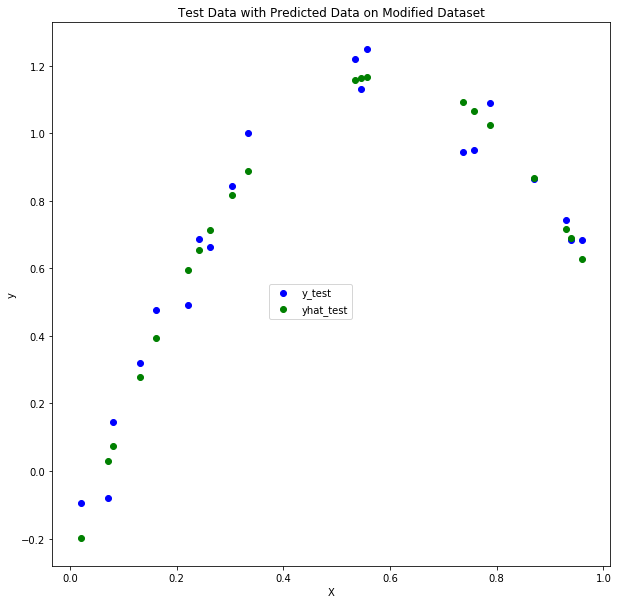

In [24]:
# Plot Test Data
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Test Data with Predicted Data on Modified Dataset")
plt.ylabel('y')
plt.xlabel('X')
plt.scatter(X_parab_test[:,0], y_parab_test,color='b', label='y_test') 
plt.scatter(X_parab_test[:,0], yhat_parab_test,color='g',label='yhat_test') 
plt.figlegend(loc='center')

plt.show() 

# Analysis on Linear Regression on Modified Dataset

Before adding the X^2, feature the training MSE was 0.104 and the test MSE was 0.97. Re-running with the additional feature, the train MSE dropped to 0.0047 and the test MSE dropped to 0.006. This is a big improvement and visually plotting the data you can see that the predicted points line up closely with the actual points. The predicted points also do not appear to follow any noise in the output.

The out of sample error and the in sample error appear reasonably close.

# Systematic Approach to Finding Features
* The approach above looked at the training set and investigated several functions (parabola, ellipse, circle, etc) on https://www.desmos.com/calculator
* Adding the X^2 feature delivered an improvement in MSE and visually the plots looked like good predictions.
* However, this visual approach is not systematic!
* To systematic investigate the feature space, I am going to use PolynomialFeatures to transform the original dataset into a range of different polynomials and see what the MSE performance looks like for the test and training data
* A degree 1 polynomial from PolynomialFeatures should correspond to the original dataset
* A degree 2 polynomial from PolynomialFeatures should correspond to the parabola dataset

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
num_degrees = 16

mlr_poly_train_mse = np.zeros(num_degrees)
mlr_poly_test_mse  = np.zeros(num_degrees)

#NOTE: Starting at 0 as it makes for better consistency with plotting and array indexing
for degree in range(0,num_degrees):

    # Set include_bias to False as the Linear Regression Homebrew class adds this term
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)

    # Fit to Training Data
    polynomial_features.fit(X_train)

    # Transform Training Data and Test Data
    X_poly_train = polynomial_features.transform(X_train)
    X_poly_test  = polynomial_features.transform(X_test)

    mlr_poly = MyLinReg(X_poly_train.shape[1])
    mlr_poly.fit(X_poly_train,y_train)

    mlr_poly_train_mse[degree] = mlr_poly.mse(X_poly_train,y_train)
    mlr_poly_test_mse[degree]  = mlr_poly.mse(X_poly_test,y_test)

    print("\nLinear Regression with Polynomial Features of Degreee:\t",degree)
    print("Training MSE :\t",mlr_poly_train_mse[degree])
    print("Test     MSE :\t",mlr_poly_test_mse[degree])


Linear Regression with Polynomial Features of Degreee:	 0
Training MSE :	 0.15524117409375002
Test     MSE :	 0.15914194890624997

Linear Regression with Polynomial Features of Degreee:	 1
Training MSE :	 0.1042692674644882
Test     MSE :	 0.09708951737742094

Linear Regression with Polynomial Features of Degreee:	 2
Training MSE :	 0.004735740085299895
Test     MSE :	 0.0060387050924853684

Linear Regression with Polynomial Features of Degreee:	 3
Training MSE :	 0.003988032747033637
Test     MSE :	 0.006132860864941229

Linear Regression with Polynomial Features of Degreee:	 4
Training MSE :	 0.003925706135841572
Test     MSE :	 0.005773619266724454

Linear Regression with Polynomial Features of Degreee:	 5
Training MSE :	 0.0039041762476760777
Test     MSE :	 0.005842439942780473

Linear Regression with Polynomial Features of Degreee:	 6
Training MSE :	 0.003897635199908887
Test     MSE :	 0.005939309837486037

Linear Regression with Polynomial Features of Degreee:	 7
Training MSE 

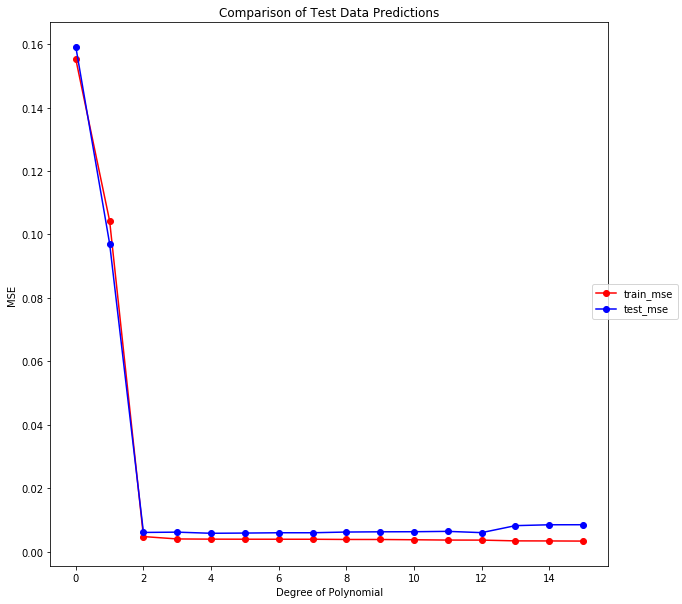

In [27]:
# Plot MSE for a variety of degress of polynomial
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Comparison of Test Data Predictions")
plt.ylabel('MSE')
plt.xlabel('Degree of Polynomial')
plt.plot(mlr_poly_train_mse, color='r', label='train_mse', marker='o') 
plt.plot(mlr_poly_test_mse,  color='b', label='test_mse', marker='o') 
plt.figlegend(loc='right')

plt.show()

# Analysis on Systematic Approach to Finding Features

* For degree = 1, the MSE results are the same for applying Linear Regression on the original dataset
* For degree = 2, the MSE results are the same for applying Linear Regression on the parabola dataset
* For polynomials of degree 3 to degree 12, the test MSE oscillates in the range 0.00577 to 0.0063
* Once the degree increase past 12, the test MSE jumps upwards past 0.008
* In contrast, as the degree of the polynomial increases, the train MSE improves and converges on a value of 0.0033 --> This just shows that the model is starting to overfit the data and train MSE is improving without a similar improvement to the out of sample test MSE
* Taking into account the VC dimension of the resulting polynomials, the test MSE and the risk of overfitting, using degree = 2 looks like the best option for this dataset and corresponds to the approach taken with the X_parab dataset

# Apply Lasso Regression Algorithm (with CV)
* Compare the performance of Linear Regression with Lasso Regression
* NOTE : I am using the version of Lasso that includes Cross Validation

In [28]:
from sklearn.linear_model import LassoCV

In [29]:
lasso_cv_orig = LassoCV(alphas = None, cv = 10, max_iter = 100000, random_state=RANDOM_STATE) 

lasso_cv_orig.fit(X_train, y_train)

y_hat_lasso_cv_orig_train = lasso_cv_orig.predict(X_train)
y_hat_lasso_cv_orig_test  = lasso_cv_orig.predict(X_test)

lasso_cv_orig_train_mse = mse(y_train,y_hat_lasso_cv_orig_train)
lasso_cv_orig_test_mse  = mse(y_test,y_hat_lasso_cv_orig_test)

print("Training MSE :\t",lasso_cv_orig_train_mse)
print("Test     MSE :\t",lasso_cv_orig_test_mse)

Training MSE :	 0.10427071916267183
Test     MSE :	 0.09707643194257873


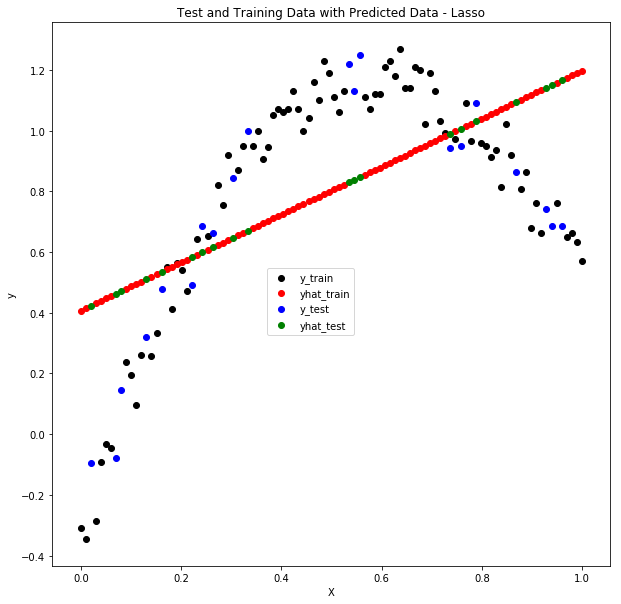

In [30]:
# Plot Training  and Test Data
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Test and Training Data with Predicted Data - Lasso")
plt.ylabel('y')
plt.xlabel('X')
plt.scatter(X_train, y_train, color='k', label='y_train') 
plt.scatter(X_train, y_hat_lasso_cv_orig_train,color='r',label='yhat_train') 
plt.scatter(X_test, y_test,color='b', label='y_test') 
plt.scatter(X_test, y_hat_lasso_cv_orig_test,color='g',label='yhat_test') 
plt.figlegend(loc='center')

plt.show() 

In [31]:
lasso_cv_parab = LassoCV(alphas = None, cv = 10, max_iter = 100000, random_state=RANDOM_STATE) 

lasso_cv_parab.fit(X_parab_train, y_parab_train)

y_hat_lasso_cv_parab_train = lasso_cv_parab.predict(X_parab_train)
y_hat_lasso_cv_parab_test  = lasso_cv_parab.predict(X_parab_test)

lasso_cv_parab_train_mse = mse(y_parab_train,y_hat_lasso_cv_parab_train)
lasso_cv_parab_test_mse  = mse(y_parab_test,y_hat_lasso_cv_parab_test)

print("Training MSE :\t",lasso_cv_parab_train_mse)
print("Test     MSE :\t",lasso_cv_parab_test_mse)

Training MSE :	 0.004738750830816757
Test     MSE :	 0.0059980499752864645


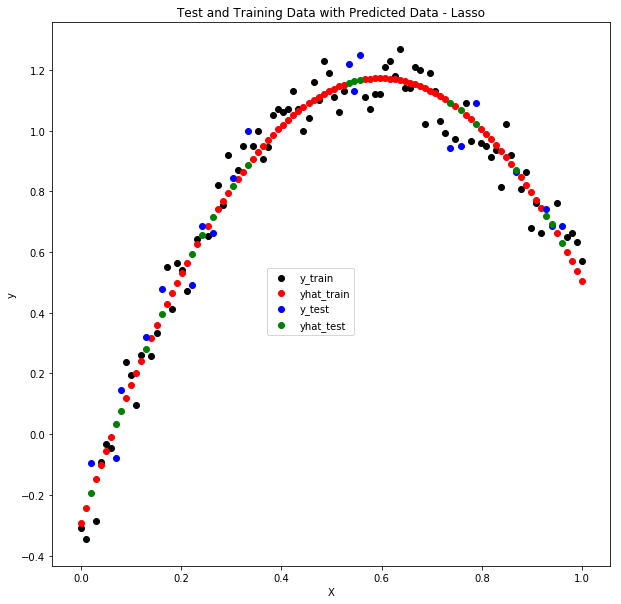

In [32]:
# Plot Training  and Test Data
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Test and Training Data with Predicted Data - Lasso")
plt.ylabel('y')
plt.xlabel('X')
plt.scatter(X_parab_train[:,0], y_parab_train, color='k', label='y_train') 
plt.scatter(X_parab_train[:,0], y_hat_lasso_cv_parab_train,color='r',label='yhat_train') 
plt.scatter(X_parab_test[:,0], y_parab_test,color='b', label='y_test') 
plt.scatter(X_parab_test[:,0], y_hat_lasso_cv_parab_test,color='g',label='yhat_test')  
plt.figlegend(loc='center')

plt.show() 

# Apply Ridge Regression Algorithm (with CV)
* Compare the performance of Ridge Regression with Lasso Regression
* NOTE : I am using the version of Lasso that includes Cross Validation

In [33]:
from sklearn.linear_model import RidgeCV

In [34]:
ridge_cv_orig = RidgeCV() 

ridge_cv_orig.fit(X_train, y_train)

y_hat_ridge_cv_orig_train = ridge_cv_orig.predict(X_train)
y_hat_ridge_cv_orig_test  = ridge_cv_orig.predict(X_test)

ridge_cv_orig_train_mse = mse(y_train,y_hat_ridge_cv_orig_train)
ridge_cv_orig_test_mse  = mse(y_test,y_hat_ridge_cv_orig_test)

print("Training MSE :\t",ridge_cv_orig_train_mse)
print("Test     MSE :\t",ridge_cv_orig_test_mse)

Training MSE :	 0.10428113595543317
Test     MSE :	 0.0970619212123902


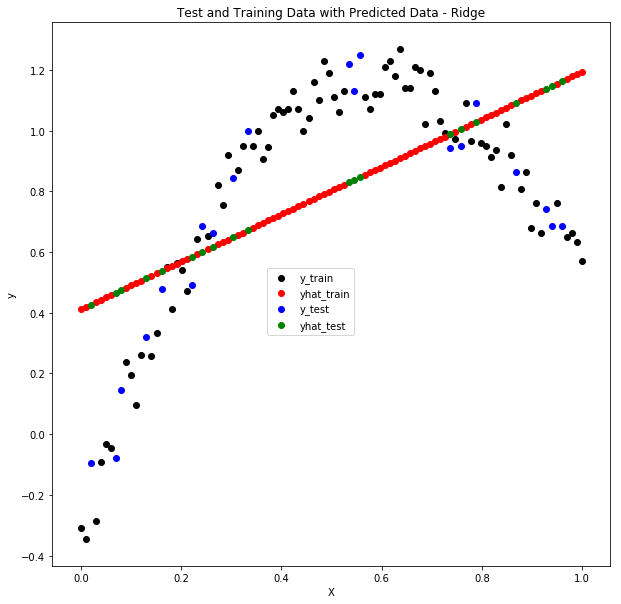

In [35]:
# Plot Training  and Test Data
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Test and Training Data with Predicted Data - Ridge")
plt.ylabel('y')
plt.xlabel('X')
plt.scatter(X_train, y_train, color='k', label='y_train') 
plt.scatter(X_train, y_hat_ridge_cv_orig_train,color='r',label='yhat_train') 
plt.scatter(X_test, y_test,color='b', label='y_test') 
plt.scatter(X_test, y_hat_ridge_cv_orig_test,color='g',label='yhat_test') 
plt.figlegend(loc='center')

plt.show() 

In [36]:
ridge_cv_parab = RidgeCV() 

ridge_cv_parab.fit(X_parab_train, y_parab_train)

y_hat_ridge_cv_parab_train = ridge_cv_parab.predict(X_parab_train)
y_hat_ridge_cv_parab_test  = ridge_cv_parab.predict(X_parab_test)

ridge_cv_parab_train_mse = mse(y_parab_train,y_hat_ridge_cv_parab_train)
ridge_cv_parab_test_mse  = mse(y_parab_test,y_hat_ridge_cv_parab_test)

print("Training MSE :\t",ridge_cv_parab_train_mse)
print("Test     MSE :\t",ridge_cv_parab_test_mse)

Training MSE :	 0.01565797568033097
Test     MSE :	 0.014263798864580946


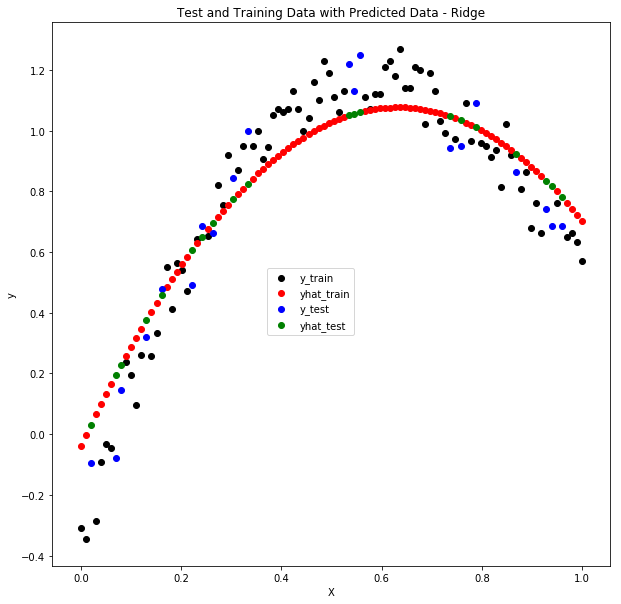

In [37]:
# Plot Training  and Test Data
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Test and Training Data with Predicted Data - Ridge")
plt.ylabel('y')
plt.xlabel('X')
plt.scatter(X_parab_train[:,0], y_parab_train, color='k', label='y_train') 
plt.scatter(X_parab_train[:,0], y_hat_ridge_cv_parab_train,color='r',label='yhat_train') 
plt.scatter(X_parab_test[:,0], y_parab_test,color='b', label='y_test') 
plt.scatter(X_parab_test[:,0], y_hat_ridge_cv_parab_test,color='g',label='yhat_test')  
plt.figlegend(loc='center')

plt.show() 

# Summary of Results
* The section below compares the performance of Linear Regression, Lasso Regression and Ridge Regression on the original dataset and on the Modified "Parabola" Dataset
* It can be see that all the algorithms deliver the same (poor) performance on the original dataset  and all deliver the same line as the predicted function
* On the modified dataset, Linear Regression and Lasso Regression deliver equivalent performance.
* Interestingly, Ridge Regression does not deliver as good as performance as Linear and Lasso and when plotted the parabola delivered by Ridge regression appears slightly "flatter" than the parabola delivered by Lasso and does not follow the data as closely
* Lasso applies L1 regularisation and Ridge applies L2 regularisation and possibly this L2 regularisation effect stopped the Ridge Regression for following the data too closely
* It is also worth noting that I applied Ridge Regression using vanilla settings and some exploration of these settings could have helped improve performance (there was not enough time to follow up on this)

In [38]:
print("------------------------------------");
print("Original Dataset Regression");
print("------------------------------------");

print("------------------------------------");
print("Linear Regression");
print("------------------------------------");
print("Training MSE :\t",mlr_orig_train_mse)
print("Test     MSE :\t",mlr_orig_test_mse)

print("------------------------------------");
print("Lasso Regression (with CV)");
print("------------------------------------");
print("Training MSE :\t",lasso_cv_orig_train_mse)
print("Test     MSE :\t",lasso_cv_orig_test_mse)

print("------------------------------------");
print("Ridge Regression (with CV)");
print("------------------------------------");
print("Training MSE :\t",ridge_cv_orig_train_mse)
print("Test     MSE :\t",ridge_cv_orig_test_mse)

------------------------------------
Original Dataset Regression
------------------------------------
------------------------------------
Linear Regression
------------------------------------
Training MSE :	 0.1042692674644882
Test     MSE :	 0.09708951737742094
------------------------------------
Lasso Regression (with CV)
------------------------------------
Training MSE :	 0.10427071916267183
Test     MSE :	 0.09707643194257873
------------------------------------
Ridge Regression (with CV)
------------------------------------
Training MSE :	 0.10428113595543317
Test     MSE :	 0.0970619212123902


In [39]:
print("------------------------------------");
print("Modified Dataset Regression");
print("------------------------------------");

print("------------------------------------");
print("Linear Regression");
print("------------------------------------");
print("Training MSE :\t",mlr_parab_train_mse)
print("Test     MSE :\t",mlr_parab_test_mse)

print("------------------------------------");
print("Lasso Regression (with CV");
print("------------------------------------");
print("Training MSE :\t",lasso_cv_parab_train_mse)
print("Test     MSE :\t",lasso_cv_parab_test_mse)

print("------------------------------------");
print("Ridge Regression (with CV");
print("------------------------------------");
print("Training MSE :\t",ridge_cv_parab_train_mse)
print("Test     MSE :\t",ridge_cv_parab_test_mse)

------------------------------------
Modified Dataset Regression
------------------------------------
------------------------------------
Linear Regression
------------------------------------
Training MSE :	 0.004735740085299895
Test     MSE :	 0.0060387050924853684
------------------------------------
Lasso Regression (with CV
------------------------------------
Training MSE :	 0.004738750830816757
Test     MSE :	 0.0059980499752864645
------------------------------------
Ridge Regression (with CV
------------------------------------
Training MSE :	 0.01565797568033097
Test     MSE :	 0.014263798864580946


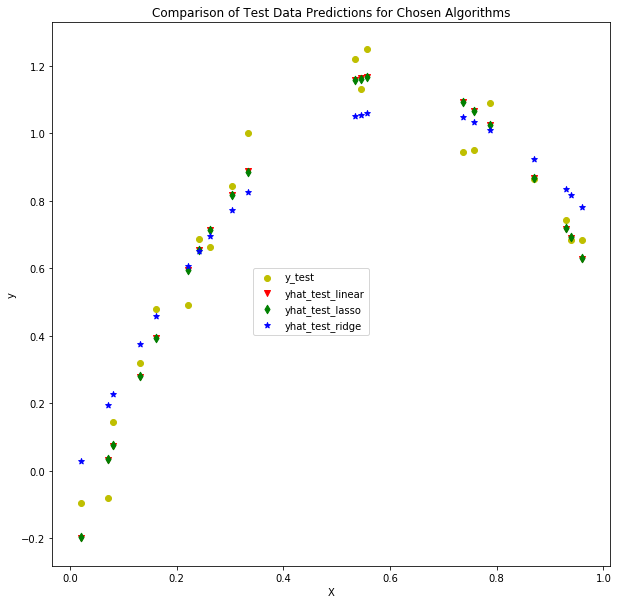

In [46]:
# Plot Predicted Data from Parabola Dataset using the Three Algorithms (linear, lasso and ridge)
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Comparison of Test Data Predictions for Chosen Algorithms")
plt.ylabel('y')
plt.xlabel('X')
plt.scatter(X_parab_test[:,0], y_parab_test,color='y', label='y_test', marker='o') 
plt.scatter(X_parab_test[:,0], yhat_parab_test,color='r',label='yhat_test_linear', marker='v') 
plt.scatter(X_parab_test[:,0], y_hat_lasso_cv_parab_test,color='g',label='yhat_test_lasso', marker='d')
plt.scatter(X_parab_test[:,0], y_hat_ridge_cv_parab_test,color='b',label='yhat_test_ridge', marker='*') 
plt.figlegend(loc='center')

plt.show() 

## R^2 Analysis
http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

This section was just an experiment to see what sort of R^2 value was delivered by Lasso (and by proxy my Linear Regression class as they seemed to have the same performance).

On initial inspection the R^2 value for the parabola dataset looks good (close to 1.0) while the R^2 value on the original dataset is not great which is expected
    

In [41]:
lasso_cv_parab.score(X_parab_test,y_parab_test)

0.9593858780767374

In [42]:
lasso_cv_parab.score(X_parab_train,y_parab_train)

0.9694749098718164

In [43]:
lasso_cv_orig.score(X_test,y_test)

0.3426740258857405

In [44]:
lasso_cv_orig.score(X_train,y_train)

0.32833077454243653